In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

from schemas import InterviewState, Analyst
from nodes import generate_question, search_web, search_wikipedia, generate_answer, save_interview, write_section
from routes import route_messages

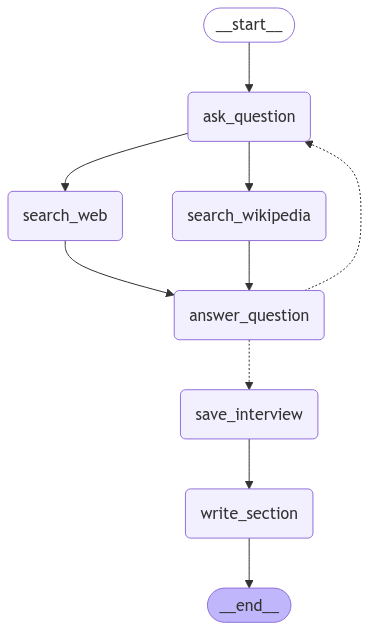

In [4]:
# Add nodes and edges 
interview_builder = StateGraph(InterviewState)
interview_builder.add_node("ask_question", generate_question)
interview_builder.add_node("search_web", search_web)
interview_builder.add_node("search_wikipedia", search_wikipedia)
interview_builder.add_node("answer_question", generate_answer)
interview_builder.add_node("save_interview", save_interview)
interview_builder.add_node("write_section", write_section)

# Flow
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question", "search_web")
interview_builder.add_edge("ask_question", "search_wikipedia")
interview_builder.add_edge("search_web", "answer_question")
interview_builder.add_edge("search_wikipedia", "answer_question")
interview_builder.add_conditional_edges("answer_question", route_messages,['ask_question','save_interview'])
interview_builder.add_edge("save_interview", "write_section")
interview_builder.add_edge("write_section", END)

# Interview 
memory = MemorySaver()
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name="Conduct Interviews")

# View
display(Image(interview_graph.get_graph().draw_mermaid_png()))

In [7]:
analyst = Analyst(
  affiliation="Tech Startup", 
  name="John Doe", 
  role="Data Scientist", 
  description="I am a data scientist with a background in computer science and statistics. I have worked on a variety of projects in the past, including predictive modeling, machine learning, and data visualization."
  )

In [8]:
from IPython.display import Markdown
from langchain_core.messages import HumanMessage

topic = "The importance of data science in cinemas"

messages = [HumanMessage(f"So you said you were writing an article on {topic}?")]
thread = {"configurable": {"thread_id": "1"}}
interview = interview_graph.invoke({"analyst": analyst, "messages": messages, "max_num_turns": 2}, thread)
Markdown(interview['sections'][0])

## The Data Science Revolution in the Film Industry

### Summary
Data science is transforming the film industry, particularly through its integration into streaming services like Netflix, Hulu, and Disney Plus. These platforms utilize sophisticated data analytics to enhance viewer experiences and optimize content production. By analyzing user behavior, including watch history and ratings, data scientists develop recommendation systems that suggest personalized content, significantly impacting viewer engagement and satisfaction [1]. 

The application of data science extends beyond mere recommendations; it influences various stages of filmmaking, from production budgeting to targeted marketing strategies. Data analytics allows filmmakers to assess potential success by analyzing historical box office data, audience preferences, and social media sentiment. This data-driven approach ensures that films align with audience expectations, thereby maximizing box office performance [2][3]. 

Interestingly, the data science revolution is not limited to large-scale productions. It also supports independent films by providing insights that can guide script development and casting decisions, ensuring that even niche content can find its audience [4]. The ability to segment audiences and tailor marketing campaigns based on data insights is reshaping how films are promoted and distributed [5]. 

Moreover, the rise of data-centric production strategies exemplified by Netflix showcases how blending mass-produced content with art-house films can cater to diverse audience segments. This dual approach not only broadens the viewer base but also enhances the overall quality of content available [6]. 

As the film industry continues to embrace data science, it is clear that the insights derived from analytics are not just supplementary; they are becoming essential to the decision-making process at every stage of production. This shift towards a data-driven culture is revolutionizing how films are made, marketed, and consumed, ultimately leading to a more dynamic and responsive film industry [7][8].

### Sources
[1] https://datacolumn.iaa.ncsu.edu/blog/2023/01/30/coming-to-a-screen-near-you-how-data-science-is-revolutionizing-the-film-industry/  
[2] https://360digitmg.com/blog/applications-of-data-analytics-in-the-movie-industry  
[3] https://7wdata.be/data-analysis/how-data-science-is-used-within-the-film-industry/  
[4] https://www.tandfonline.com/doi/full/10.1080/01605682.2019.1705194  
[5] https://medium.com/@analyticsemergingindia/top-10-use-cases-of-data-analytics-in-film-industry-db20fda72cf1  
[6] https://institutedata.com/blog/data-science-in-the-entertainment-industry/  
[7] https://en.wikipedia.org/wiki/Marketing_research  
[8] https://en.wikipedia.org/wiki/Marketing  